In [43]:
#pip install librosa

In [1]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
song = '/Users/tetyananesdill/Downloads/02 - Popular Monster [Explicit].mp3'

In [9]:
def read_files(directory):
    files = []
    for file in os.listdir(directory):
        path = os.path.join(directory, file)
        y, sr = librosa.load(path)
        files.append((file, y, sr))
    return files

In [17]:
y, sr = librosa.load(song)

def calc_features(y, sr):
    y, _ = librosa.effects.trim(y)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroids_delta = librosa.feature.delta(spectral_centroids)
    spectral_centroids_accelerate = librosa.feature.delta(spectral_centroids, order=2)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y,sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    
    spectral_centroids_mean = np.mean(spectral_centroids)
    spectral_centroids_delta_mean = np.mean(spectral_centroids_delta)
    spectral_centroids_accelerate_mean = np.mean(spectral_centroids_accelerate)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate) 
    rms_mean = np.mean(rms) 
    chroma_stft_mean = np.mean(chroma_stft)
    
    return spectral_centroids_mean, spectral_centroids_delta_mean, spectral_centroids_accelerate_mean, spectral_bandwidth_mean,spectral_rolloff_mean, zero_crossing_rate_mean,rms_mean, chroma_stft_mean
    
    
calc_features(y, sr)

(2355.273904907638,
 0.43445457168189483,
 0.054267944402014975,
 2409.3515120390757,
 4941.00906313806,
 0.10704023048035108,
 0.31064552,
 0.4140278)

In [6]:
spectral_centroids

array([[ 864.47507048,  420.72320952,  388.03131869, ..., 4316.8575231 ,
        4363.59463866, 4443.36887599]])

[Text(0.5, 1.0, 'log Power spectrogram')]

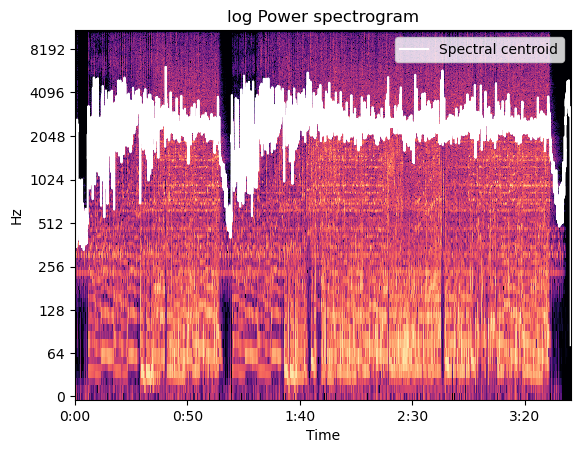

In [11]:
times = librosa.times_like(spectral_centroids)
fig, ax = plt.subplots()
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, spectral_centroids.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

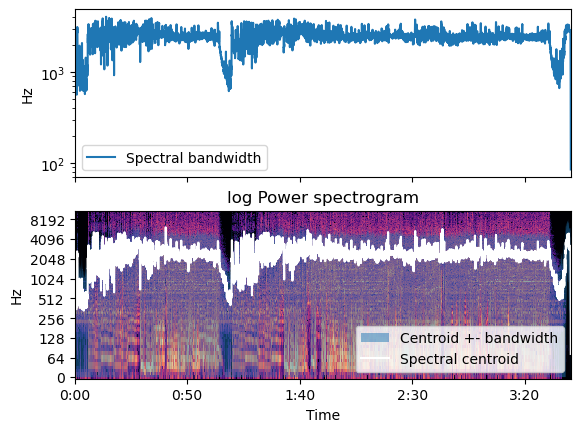

In [12]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spectral_bandwidth)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spectral_bandwidth[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spectral_bandwidth[0]),
                np.minimum(centroid[0] + spectral_bandwidth[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

In [15]:
spectral_centroids_mean = np.mean(spectral_centroids)
spectral_centroids_delta_mean = np.mean(spectral_centroids_delta)
spectral_centroids_accelerate_mean = np.mean(spectral_centroids_accelerate)
spectral_bandwidth_mean = np.mean(spectral_bandwidth)
spectral_rolloff_mean = np.mean(spectral_rolloff)
zero_crossing_rate_mean = np.mean(zero_crossing_rate) 
rms_mean = np.mean(rms) 
chroma_stft_mean = np.mean(chroma_stft)

In [16]:
print(spectral_centroids_mean, spectral_centroids_delta_mean, 
      spectral_centroids_accelerate_mean, spectral_bandwidth_mean,
     spectral_rolloff_mean, zero_crossing_rate_mean,rms_mean, chroma_stft_mean)

2364.013118432613 -0.5962631416756626 0.05415287957679622 2412.572102786331 4957.2253903782375 0.10781042308249104 0.308357 0.41588324


In [31]:
df = pd.DataFrame(read_files('/Users/tetyananesdill/Downloads/fma_small/001'))
df.columns =['song name', 'y', 'sr']

In [20]:
lis = read_files('/Users/tetyananesdill/Downloads/fma_small/001')

In [32]:
features = [calc_features(item[1], item[2]) for item in lis]
features_df = pd.DataFrame(features)
features_df.columns = ['spectral_centroids_mean' , 'spectral_centroids_delta_mean',
                      'spectral_centroids_accelerate_mean', 'spectral_bandwidth_mean', 
                      'spectral_rolloff_mean', 'zero_crossing_rate_mean', 'rms_mean', 'chroma_stft_mean']

In [34]:
pd.concat([df, features_df], axis=1)

,song name,y,sr,spectral_centroids_mean,spectral_centroids_delta_mean,spectral_centroids_accelerate_mean,spectral_bandwidth_mean,spectral_rolloff_mean,zero_crossing_rate_mean,rms_mean,chroma_stft_mean
0,001681.mp3,"[7.450581e-09, 1.4901161e-08, 5.5879354e-09, 1...",22050,2566.606820,0.917992,0.035971,2639.047874,5500.282284,0.114069,0.153798,0.268328
1,001642.mp3,"[-4.660723e-09, 9.785957e-09, 5.522808e-09, 5....",22050,2882.418658,1.260231,-0.399890,2743.565598,6149.746147,0.146213,0.119182,0.380470
2,001087.mp3,"[1.4901161e-08, 4.4703484e-08, 7.4505806e-08, ...",22050,2130.992996,1.053612,-0.047981,2105.078599,4294.566710,0.091700,0.329319,0.444307
3,001736.mp3,"[-2.7939677e-09, -6.519258e-09, 6.519258e-09, ...",22050,1829.630483,0.166565,0.678582,1929.607904,3710.024119,0.093500,0.106110,0.396603
4,001680.mp3,"[-1.21071935e-08, -2.2351742e-08, 1.3038516e-0...",22050,1683.853799,-0.547695,0.116832,1997.641437,3439.299549,0.073715,0.126550,0.245533
5,001482.mp3,"[3.3527613e-08, 7.0780516e-08, 2.9802322e-08, ...",22050,723.566604,1.146576,0.591164,1506.881505,1181.448962,0.015566,0.278789,0.370954
6,001443.mp3,"[7.450581e-09, 2.9802322e-08, 4.4703484e-08, 4...",22050,1310.787217,0.112707,-0.147734,1661.448033,2456.903450,0.060080,0.250894,0.358733
7,001682.mp3,"[5.122274e-09, -6.0535967e-09, -2.0954758e-09,...",22050,2246.558959,-0.168964,-0.106003,2388.715147,4557.174690,0.092043,0.142182,0.281526
8,001735.mp3,"[-1.8626451e-09, -1.3038516e-08, -3.1664968e-0...",22050,2751.392558,0.984446,-0.407044,2520.707814,5727.390025,0.142598,0.242257,0.421861
9,001278.mp3,"[-1.3038516e-08, -4.656613e-10, -4.1909516e-09...",22050,1549.968271,-0.152850,0.487361,1875.977179,3054.242552,0.069012,0.133195,0.354782
